<a href="https://colab.research.google.com/github/refan2394/Data-Mining-PostTest2/blob/main/113_Muhammad_Dwi_Refansyah_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

##Tabel Tabulasi


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# data in the form of transaction list
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

print("\nTABULASI")
df = pd.DataFrame(data)
df = pd.get_dummies(df.stack()).sum(level=0)
print(df)


TABULASI
    beef  butter  butter milk  canned beer  cling film/bags  curd  \
0      0       0            0            0                0     0   
1      0       0            0            0                0     0   
2      0       0            0            0                0     0   
3      0       0            0            1                0     0   
4      0       0            0            0                0     0   
5      0       0            0            0                0     0   
6      0       0            0            0                0     0   
7      0       0            0            0                0     0   
8      0       0            0            0                0     1   
9      1       0            0            0                0     0   
10     0       1            0            0                0     0   
11     0       0            0            0                0     0   
12     0       0            0            0                0     0   
13     0       0        

<ipython-input-39-643e8049610b>:25: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df = pd.get_dummies(df.stack()).sum(level=0)


###Daftar support dan Confident

In [ ]:
# data in the form of transaction list
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

# convert data to one-hot encoding format
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# find frequently occurring itemsets (support) with Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# find association rules with Association Rule Mining algorithm
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# create table of support for itemsets
df_support = frequent_itemsets
df_support['support'] = df_support['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_support = df_support.rename(columns={"itemsets": "itemset"})
df_support = df_support.set_index('itemset')
print(df_support)

# create table of support and confidence for rules
df_rules = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

# filter rules with only one antecedent and one consequent
df_rules = df_rules[df_rules['antecedents'].apply(lambda x: len(x) == 1) & df_rules['consequents'].apply(lambda x: len(x) == 1)]

# format antecedent and consequent columns
df_rules['antecedents'] = df_rules['antecedents'].apply(lambda x: list(x)[0])
df_rules['consequents'] = df_rules['consequents'].apply(lambda x: list(x)[0])

# set antecedent as index and sort by confidence
df_rules = df_rules.set_index('antecedents')
df_rules = df_rules.sort_values(by=['confidence'], ascending=False)

# create table of support and confidence for filtered rules
df_rules = df_rules[['consequents', 'support', 'confidence']]
df_rules['support'] = df_rules['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_rules['confidence'] = df_rules['confidence'].apply(lambda x: "{:.2f}%".format(x*100))
print("\n")
print("HASIL SUPPORT DAN CONFIDENCE")
print("\n")

print(df_rules)


                                                   support
itemset                                                   
(beef)                                               5.26%
(butter)                                             5.26%
(butter milk)                                        5.26%
(canned beer)                                        5.26%
(cling film/bags)                                    5.26%
...                                                    ...
(semi-finished bread, whole milk, sausage)           5.26%
(yogurt, semi-finished bread, sausage)               5.26%
(yogurt, whole milk, sausage)                        5.26%
(yogurt, whole milk, semi-finished bread)            5.26%
(yogurt, whole milk, sausage, semi-finished bread)   5.26%

[65 rows x 1 columns]


HASIL SUPPORT DAN CONFIDENCE


                             consequents support confidence
antecedents                                                
beef                         white bread   5.26%    100.0

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

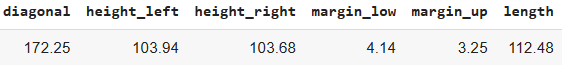
<!-- 1412 -->

In [ ]:
import pandas as pd
import math

# Membuat data frame
df = pd.read_csv('deteksi_uang_palsu.csv')

# Menentukan target prediksi
target = {'height_left': 172.25,
          'height_right': 103.94,
          'margin_low': 103.68,
          'margin_up': 4.14,
          'length': 3.25}

# Membuat kolom jarak
df['jarak'] = df.apply(lambda x: math.sqrt((x['height_left'] - target['height_left'])**2 + 
                                           (x['height_right'] - target['height_right'])**2 + 
                                           (x['margin_low'] - target['margin_low'])**2 + 
                                           (x['margin_up'] - target['margin_up'])**2 + 
                                           (x['length'] - target['length'])**2), axis=1)

# Menampilkan tabel jarak
print(df)




   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
1        True    171.66       103.68        103.41        4.35       3.33   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
4        True    171.79       104.57        104.04        4.26       3.15   
5       False    172.00       104.23        104.52        5.76       3.37   
6       False    171.56       104.03        103.93        5.47       3.50   
7       False    171.90       104.33        104.40        4.70       3.31   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   

   length       jarak  
0  113.02  162.985541  
1  113.74  163.637621  
2  113.12  163.039278  
3  113.30  163.154696  
4  113.46  163.132317  
5  110.9

In [ ]:
import pandas as pd
import math

# load data
df = pd.read_csv("deteksi_uang_palsu.csv")

# hitung jarak dari setiap data terhadap target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]
jarak = []
for i in range(len(df)):
    d = 0
    for j in range(1, 7):
        d += (df.iloc[i, j] - target[j-1])**2
    jarak.append(math.sqrt(d))
df['jarak'] = jarak

# urutkan data berdasarkan jarak terdekat
K = int(math.sqrt(len(df)))
df_sorted = df.sort_values(by='jarak').head(K)

# tampilkan data terurut
print(df_sorted)


# Menghitung jumlah nilai True dan False untuk K terdekat
num_true = len(df_sorted[df_sorted["is_genuine"] == True])
num_false = len(df_sorted[df_sorted["is_genuine"] == False])
print("\n")
print("Jumlah True: ", num_true)
print("Jumlah False: ", num_false)


   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   

   length     jarak  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


Jumlah True:  3
Jumlah False:  0


In [ ]:
# mengambil data terdekat dengan target
data = pd.read_csv("deteksi_uang_palsu.csv")

test_data = pd.DataFrame({
    'is_genuine': [True],
    'diagonal': [172.20],
    'height_left': [104.12],
    'height_right': [103.64],
    'margin_low': [4.38],
    'margin_up': [3.00],
    'length': [113.18]
})

# menghitung jarak
distances = pd.DataFrame()
distances['distance'] = ((data.iloc[:,1:] - test_data.iloc[:,1:])**2).sum(axis=1)**0.5

# menambahkan kolom jarak ke data
data['distance'] = distances['distance']

# mengurutkan data berdasarkan jarak terdekat
k = int(math.sqrt(len(data)))
sorted_data = data.sort_values(by='distance').head(k)

# melakukan klasifikasi berdasarkan mayoritas kelas
pred_label = sorted_data['is_genuine'].value_counts().idxmax()

# menampilkan hasil prediksi
print("Hasil prediksi: ", pred_label)


Hasil prediksi:  True


# (3) Analisis

> Nama : Muhammad Dwi Refansyah

> Nim : 2109116113


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Breast Cancer Proteomes

#Business Understanding

Dataset ini bertujuan mengetahui Data pasien kanker payudara

##Data Understanding

In [4]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
sns.set(style = 'whitegrid')
import textwrap

In [5]:
df = pd.read_csv("clinical_data_breast_cancer.csv")
df

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,TCGA-BH-A0C7,FEMALE,48,Positive,Negative,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,0,4,4,LumA/B,5,4,1,3
101,TCGA-BH-A0DD,MALE,58,Positive,Positive,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,-6,4,4,LumA/B,3,4,1,3
102,TCGA-C8-A12U,FEMALE,46,Positive,Positive,Negative,T2,T_Other,N1,Positive,...,Luminal B,-5,-2,5,4,Basal,5,4,1,1
103,TCGA-C8-A12W,FEMALE,49,Positive,Positive,Negative,T4,T_Other,N1,Positive,...,Luminal B,-5,-2,4,4,ReacII,3,4,1,1


In [6]:
df.head()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [7]:
df.tail()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
100,TCGA-BH-A0C7,FEMALE,48,Positive,Negative,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,0,4,4,LumA/B,5,4,1,3
101,TCGA-BH-A0DD,MALE,58,Positive,Positive,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,-6,4,4,LumA/B,3,4,1,3
102,TCGA-C8-A12U,FEMALE,46,Positive,Positive,Negative,T2,T_Other,N1,Positive,...,Luminal B,-5,-2,5,4,Basal,5,4,1,1
103,TCGA-C8-A12W,FEMALE,49,Positive,Positive,Negative,T4,T_Other,N1,Positive,...,Luminal B,-5,-2,4,4,ReacII,3,4,1,1
104,TCGA-E2-A15A,FEMALE,45,Positive,Positive,Negative,T2,T_Other,N3,Positive,...,Luminal B,-5,-2,4,4,Her2,4,4,1,1


In [8]:
# df1 isinya dataset dengan label target TCGA-BH-A0C7
df1 = df[df['Complete TCGA ID'] == 'TCGA-BH-A0C7'] 

# Menampilkan hasil filter
print(df1)

    Complete TCGA ID  Gender  Age at Initial Pathologic Diagnosis ER Status  \
100     TCGA-BH-A0C7  FEMALE                                   48  Positive   

    PR Status HER2 Final Status Tumor Tumor--T1 Coded Node Node-Coded  ...  \
100  Negative          Positive    T2         T_Other   N1   Positive  ...   

    PAM50 mRNA SigClust Unsupervised mRNA SigClust Intrinsic mRNA  \
100  Luminal B                         -3                       0   

    miRNA Clusters methylation Clusters RPPA Clusters  CN Clusters  \
100              4                    4        LumA/B            5   

     Integrated Clusters (with PAM50)  Integrated Clusters (no exp)  \
100                                 4                             1   

     Integrated Clusters (unsup exp)  
100                                3  

[1 rows x 30 columns]


In [9]:
# df2 isinya dataset dengan label target bukan T4
df2 = df[df['Tumor'] == 'T4'] 

# Menampilkan hasil filter
print(df2)

    Complete TCGA ID  Gender  Age at Initial Pathologic Diagnosis ER Status  \
14      TCGA-AN-A0AL  FEMALE                                   41  Negative   
63      TCGA-A8-A08Z  FEMALE                                   76  Positive   
87      TCGA-A8-A06N  FEMALE                                   66  Positive   
89      TCGA-A8-A079  FEMALE                                   69  Positive   
95      TCGA-AN-A0FK  FEMALE                                   88  Positive   
103     TCGA-C8-A12W  FEMALE                                   49  Positive   

    PR Status HER2 Final Status Tumor Tumor--T1 Coded Node Node-Coded  ...  \
14   Negative          Negative    T4         T_Other   N0   Negative  ...   
63   Positive          Negative    T4         T_Other   N3   Positive  ...   
87   Negative          Negative    T4         T_Other   N0   Negative  ...   
89   Positive          Negative    T4         T_Other   N3   Positive  ...   
95   Positive          Negative    T4         T_Other   

##describe data

In [10]:
# df3 isinya dataset dengan label target Revital
df3 = df[df['Tumor'] == 'T3']

# Menampilkan hasil filter
print(df3)

   Complete TCGA ID  Gender  Age at Initial Pathologic Diagnosis ER Status  \
0      TCGA-A2-A0T2  FEMALE                                   66  Negative   
4      TCGA-BH-A0E0  FEMALE                                   38  Negative   
6      TCGA-D8-A142  FEMALE                                   74  Negative   
26     TCGA-A2-A0T1  FEMALE                                   55  Negative   
27     TCGA-BH-A0EE  FEMALE                                   68  Negative   
33     TCGA-A8-A09G  FEMALE                                   79  Positive   
40     TCGA-C8-A130  FEMALE                                   52  Positive   
47     TCGA-BH-A0HP  FEMALE                                   65  Positive   
49     TCGA-A2-A0YL  FEMALE                                   48  Positive   
52     TCGA-A2-A0T6  FEMALE                                   50  Positive   
54     TCGA-A2-A0YD  FEMALE                                   63  Positive   
59     TCGA-AO-A12E  FEMALE                                   51

In [11]:
# df4 isinya dataset dengan label target selling_price di bawah 100
df4 = df[df['methylation Clusters'] < 10]

# Menampilkan hasil filter
print(df4)

    Complete TCGA ID  Gender  Age at Initial Pathologic Diagnosis ER Status  \
0       TCGA-A2-A0T2  FEMALE                                   66  Negative   
1       TCGA-A2-A0CM  FEMALE                                   40  Negative   
2       TCGA-BH-A18V  FEMALE                                   48  Negative   
3       TCGA-BH-A18Q  FEMALE                                   56  Negative   
4       TCGA-BH-A0E0  FEMALE                                   38  Negative   
..               ...     ...                                  ...       ...   
100     TCGA-BH-A0C7  FEMALE                                   48  Positive   
101     TCGA-BH-A0DD    MALE                                   58  Positive   
102     TCGA-C8-A12U  FEMALE                                   46  Positive   
103     TCGA-C8-A12W  FEMALE                                   49  Positive   
104     TCGA-E2-A15A  FEMALE                                   45  Positive   

    PR Status HER2 Final Status Tumor Tumor--T1 Cod

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Complete TCGA ID                     105 non-null    object 
 1   Gender                               105 non-null    object 
 2   Age at Initial Pathologic Diagnosis  105 non-null    int64  
 3   ER Status                            105 non-null    object 
 4   PR Status                            105 non-null    object 
 5   HER2 Final Status                    105 non-null    object 
 6   Tumor                                105 non-null    object 
 7   Tumor--T1 Coded                      105 non-null    object 
 8   Node                                 105 non-null    object 
 9   Node-Coded                           105 non-null    object 
 10  Metastasis                           105 non-null    object 
 11  Metastasis-Coded                

In [13]:
df.select_dtypes(include=np.number)

,Age at Initial Pathologic Diagnosis,Days to Date of Last Contact,Days to date of Death,OS event,OS Time,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,66,240,240.0,1,240,0,-13,3,5,3,2,2,2
1,40,754,754.0,1,754,-12,-13,4,4,4,2,1,1
2,48,1555,1555.0,1,1555,-12,-13,5,5,1,2,2,2
3,56,1692,1692.0,1,1692,-12,-13,5,5,1,2,2,2
4,38,133,NaN,0,133,0,-13,5,5,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,48,1305,NaN,0,1305,-3,0,4,4,5,4,1,3
101,58,1393,NaN,0,1393,-3,-6,4,4,3,4,1,3
102,46,0,NaN,0,0,-5,-2,5,4,5,4,1,1
103,49,0,NaN,0,0,-5,-2,4,4,3,4,1,1


In [14]:
def tampil(kolom):
  dfnum = df[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maksimum        :", dfnum.max())

In [15]:
tampil("methylation Clusters")

Nilai minimum         : 1
Nilai maksimum        : 5


In [16]:
tampil("miRNA Clusters")

Nilai minimum         : 1
Nilai maksimum        : 7


In [17]:
tampil("CN Clusters")

Nilai minimum         : 1
Nilai maksimum        : 5


#Explore Data

# Visualisasi Comparison

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [19]:
df

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,TCGA-BH-A0C7,FEMALE,48,Positive,Negative,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,0,4,4,LumA/B,5,4,1,3
101,TCGA-BH-A0DD,MALE,58,Positive,Positive,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,-6,4,4,LumA/B,3,4,1,3
102,TCGA-C8-A12U,FEMALE,46,Positive,Positive,Negative,T2,T_Other,N1,Positive,...,Luminal B,-5,-2,5,4,Basal,5,4,1,1
103,TCGA-C8-A12W,FEMALE,49,Positive,Positive,Negative,T4,T_Other,N1,Positive,...,Luminal B,-5,-2,4,4,ReacII,3,4,1,1


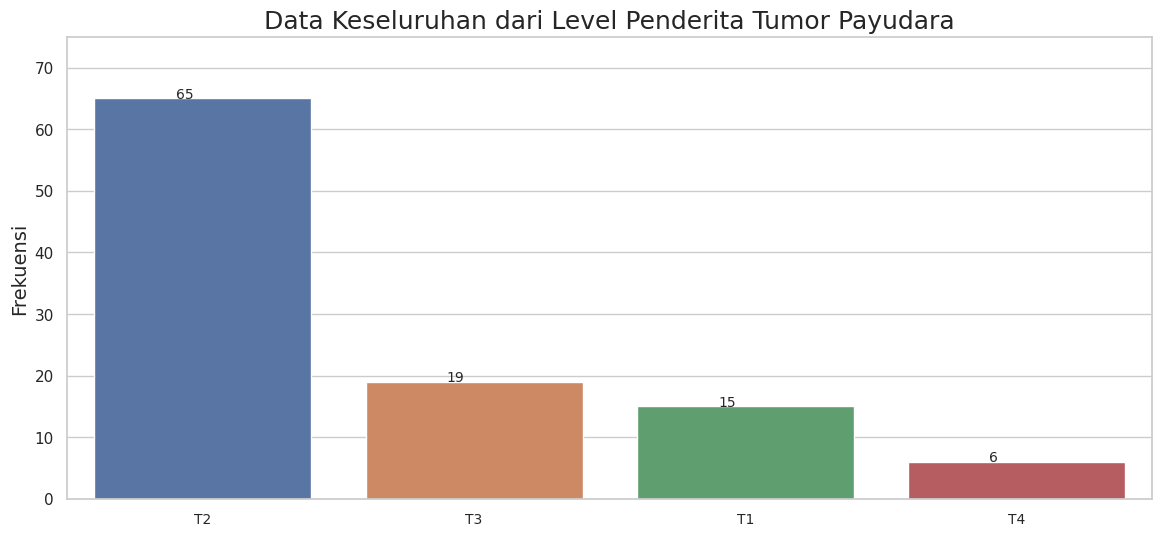

In [20]:
fig, ax = plt.subplots(figsize = (14, 6))
max_width = 13

index = df['Tumor'].fillna('NaN').value_counts().index[0:4]
count = df['Tumor'].fillna('NaN').value_counts()[0:4]
sns.barplot(x = index, y = count, order = index)
ax.set_title('Data Keseluruhan dari Level Penderita Tumor Payudara', fontsize = 18)
ax.set_xticklabels((textwrap.fill(x, max_width) for x in index), fontsize = 10)
for i, count in enumerate(count):
    ax.text(x=i-0.1 , y =count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Frekuensi', fontsize = 14)
ax.set_ylim(0, df['Tumor'].fillna('NaN').value_counts()[0]+10)

plt.show()

# Visual Distribution

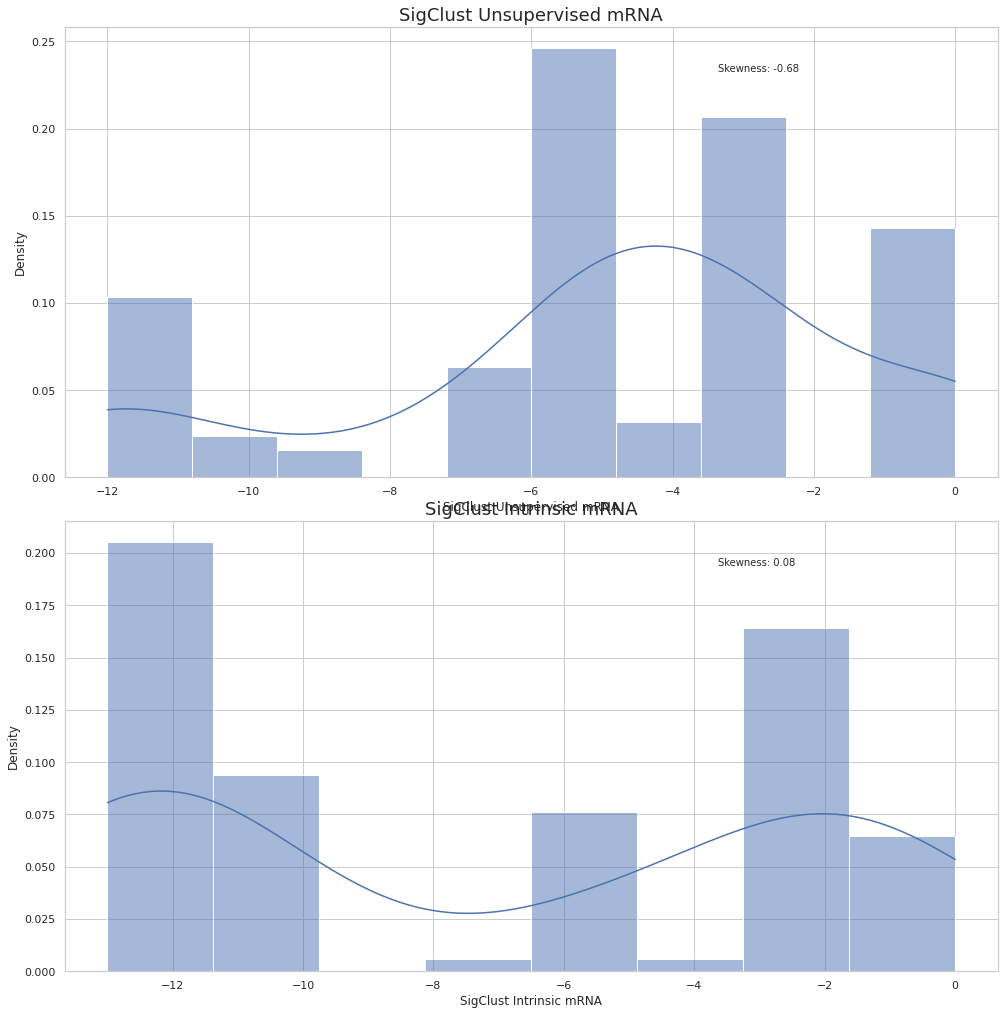

In [ ]:
# Mendefinisikan Kolom pada list dari dataset
num_cols = ['SigClust Unsupervised mRNA', 'SigClust Intrinsic mRNA']

# Membuat diagram
fig, ax = plt.subplots(2, figsize=(14, 14))
fig.tight_layout(pad=2)

for ax, col in zip(ax.flatten(), num_cols):
    sns.histplot(ax=ax, data=df, x=col, kde=True, stat='density')
    ax.set_title(col, fontsize=18)
    ax.annotate(f"Skewness: {df[col].skew():.2f}", xy=(0.7, 0.9), xycoords='axes fraction')

plt.show()

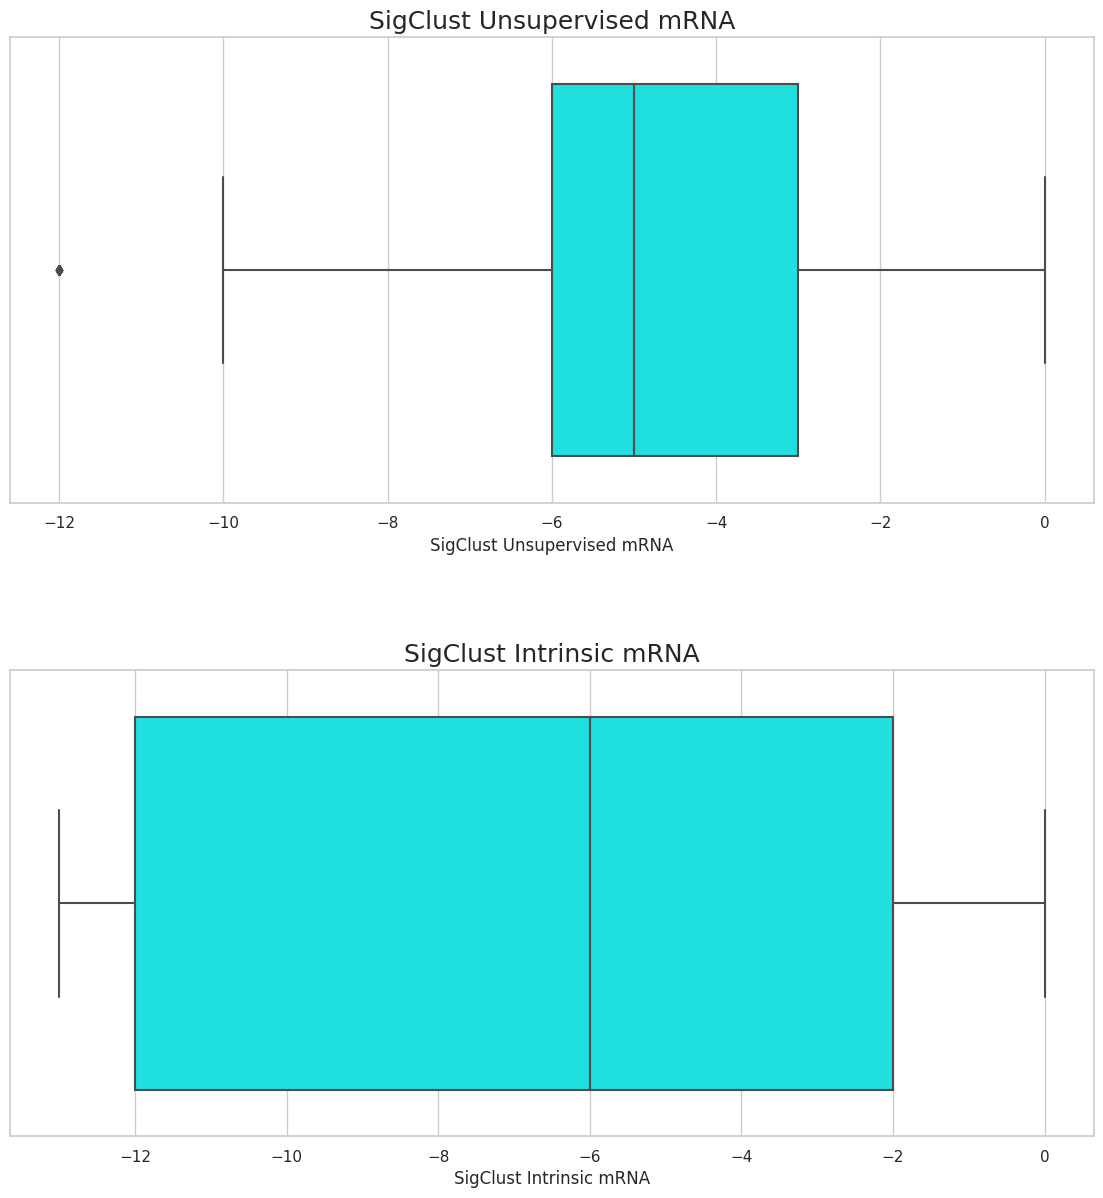

In [21]:
num_cols = ['SigClust Unsupervised mRNA', 'SigClust Intrinsic mRNA']

fig, ax = plt.subplots(len(num_cols), 1, figsize = (14, 14))
fig.tight_layout(pad = 8)

for i, col in enumerate(num_cols):
    sns.boxplot(ax = ax[i], x = df[col], orient = 'h', color = 'aqua')
    ax[i].set_title(col, fontsize = 18)

plt.show()

# Visualisasi Relationship

In [22]:
df

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,TCGA-BH-A0C7,FEMALE,48,Positive,Negative,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,0,4,4,LumA/B,5,4,1,3
101,TCGA-BH-A0DD,MALE,58,Positive,Positive,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,-6,4,4,LumA/B,3,4,1,3
102,TCGA-C8-A12U,FEMALE,46,Positive,Positive,Negative,T2,T_Other,N1,Positive,...,Luminal B,-5,-2,5,4,Basal,5,4,1,1
103,TCGA-C8-A12W,FEMALE,49,Positive,Positive,Negative,T4,T_Other,N1,Positive,...,Luminal B,-5,-2,4,4,ReacII,3,4,1,1


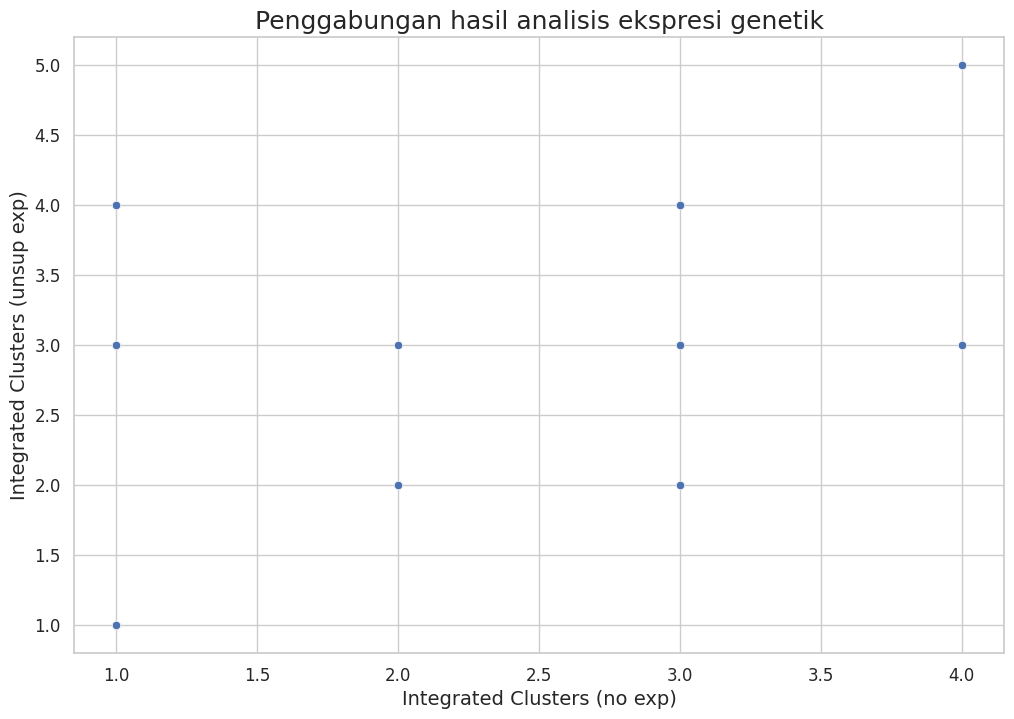

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x="Integrated Clusters (no exp)", y="Integrated Clusters (unsup exp)")
ax.set_title('Penggabungan hasil analisis ekspresi genetik', fontsize=18)
ax.set_xlabel('Integrated Clusters (no exp)', fontsize=14)
ax.set_ylabel('Integrated Clusters (unsup exp)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Visualisasi Composition

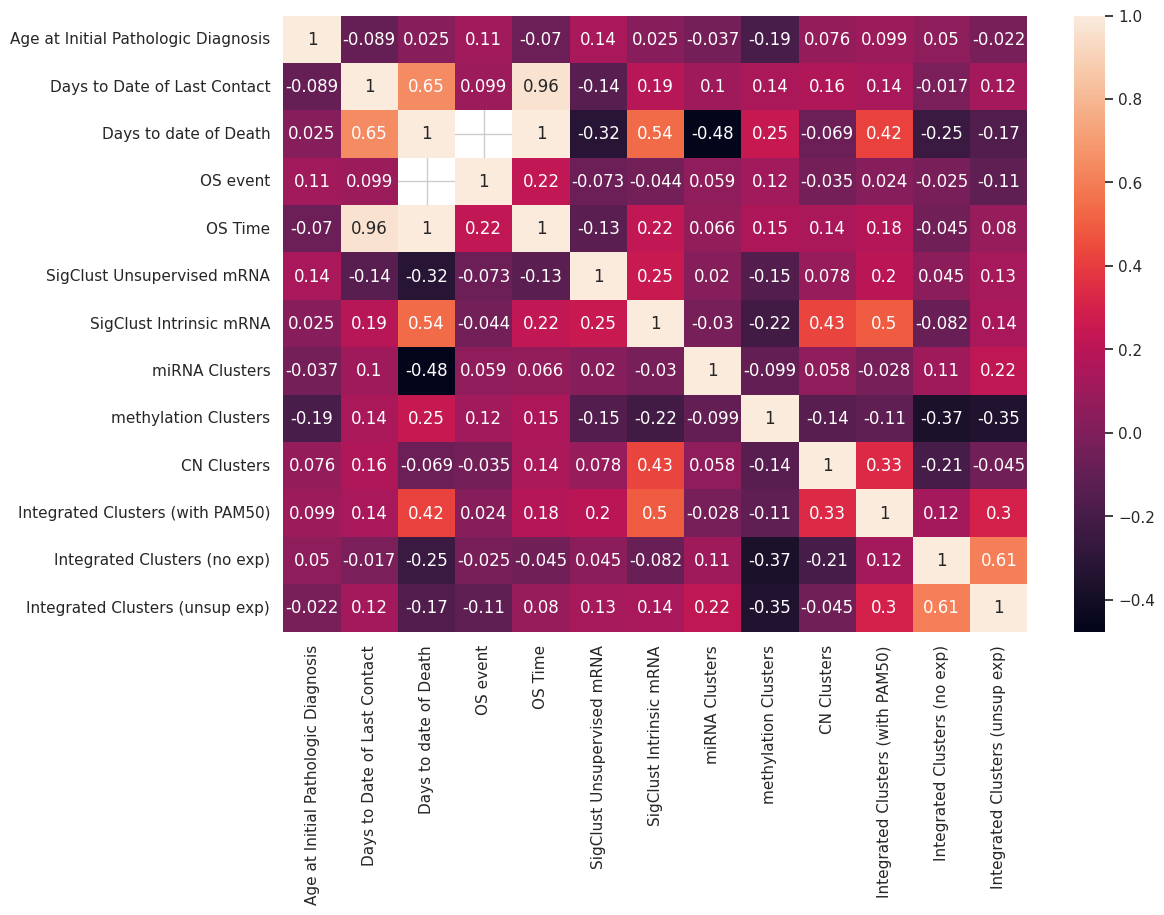

In [24]:
cormat = df.corr()
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
ax.set_yticklabels(cormat.columns, rotation = 0)
plt.show()

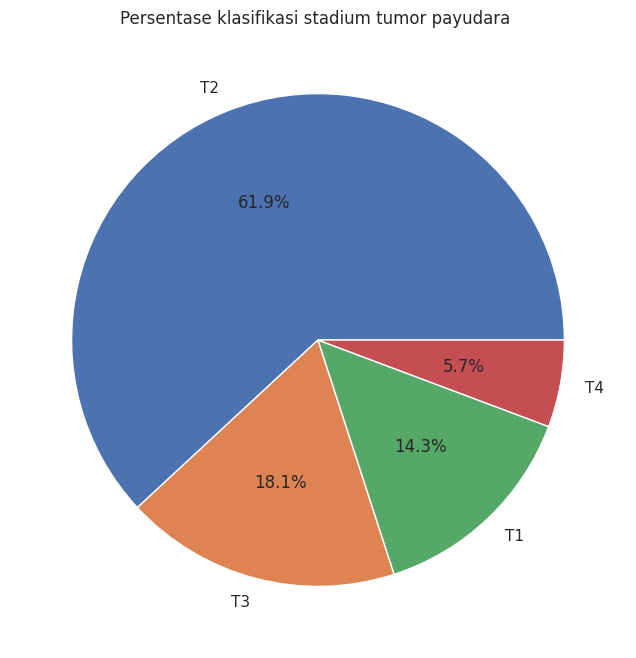

In [25]:
#Calculate count of each Level tumor
level_count = df['Tumor'].value_counts()

#Create pie chart for Level tumor
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(level_count, labels=level_count.index, autopct='%1.1f%%')
ax.set_title('Persentase klasifikasi stadium tumor payudara ')
plt.show()

#Verify data qualify

In [26]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Complete TCGA ID                        0
Gender                                  0
Age at Initial Pathologic Diagnosis     0
ER Status                               0
PR Status                               0
HER2 Final Status                       0
Tumor                                   0
Tumor--T1 Coded                         0
Node                                    0
Node-Coded                              0
Metastasis                              0
Metastasis-Coded                        0
AJCC Stage                              0
Converted Stage                         0
Survival Data Form                      0
Vital Status                            0
Days to Date of Last Contact            0
Days to date of Death                  94
OS event                                0
OS Time                                 0
PAM50 mRNA                              0
SigClust Unsupervised mRNA              0
SigClust Intrinsic mRNA                 0
miRNA Clusters   

In [27]:
# Check for duplicates
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [28]:
# Check for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

Outliers:
 AJCC Stage                              0
Age at Initial Pathologic Diagnosis     0
CN Clusters                             0
Complete TCGA ID                        0
Converted Stage                         0
Days to Date of Last Contact            0
Days to date of Death                   0
ER Status                               0
Gender                                  0
HER2 Final Status                       0
Integrated Clusters (no exp)            0
Integrated Clusters (unsup exp)         0
Integrated Clusters (with PAM50)        0
Metastasis                              0
Metastasis-Coded                        0
Node                                    0
Node-Coded                              0
OS Time                                 0
OS event                               11
PAM50 mRNA                              0
PR Status                               0
RPPA Clusters                           0
SigClust Intrinsic mRNA                 0
SigClust Unsupervised m

<ipython-input-28-650d731e3b3f>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


In [29]:
# Check data types
print("Data types:\n", df.dtypes)

Data types:
 Complete TCGA ID                        object
Gender                                  object
Age at Initial Pathologic Diagnosis      int64
ER Status                               object
PR Status                               object
HER2 Final Status                       object
Tumor                                   object
Tumor--T1 Coded                         object
Node                                    object
Node-Coded                              object
Metastasis                              object
Metastasis-Coded                        object
AJCC Stage                              object
Converted Stage                         object
Survival Data Form                      object
Vital Status                            object
Days to Date of Last Contact             int64
Days to date of Death                  float64
OS event                                 int64
OS Time                                  int64
PAM50 mRNA                              object


#Data preparation

#Select Data

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv("clinical_data_breast_cancer.csv")

In [32]:
df

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,TCGA-BH-A0C7,FEMALE,48,Positive,Negative,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,0,4,4,LumA/B,5,4,1,3
101,TCGA-BH-A0DD,MALE,58,Positive,Positive,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,-6,4,4,LumA/B,3,4,1,3
102,TCGA-C8-A12U,FEMALE,46,Positive,Positive,Negative,T2,T_Other,N1,Positive,...,Luminal B,-5,-2,5,4,Basal,5,4,1,1
103,TCGA-C8-A12W,FEMALE,49,Positive,Positive,Negative,T4,T_Other,N1,Positive,...,Luminal B,-5,-2,4,4,ReacII,3,4,1,1


In [33]:
# Membuat hanya menampikan 2 Kolom
selected_data = df[["Gender", "Age at Initial Pathologic Diagnosis"]]

# Menampilkan Perintah
print(selected_data.head())

   Gender  Age at Initial Pathologic Diagnosis
0  FEMALE                                   66
1  FEMALE                                   40
2  FEMALE                                   48
3  FEMALE                                   56
4  FEMALE                                   38


In [34]:
# Membuat hanya menampikan 3 Kolom
selected_data = df[["Gender", "Age at Initial Pathologic Diagnosis", "Tumor"]]

# Menampilkan Perintah
print(selected_data.head())

   Gender  Age at Initial Pathologic Diagnosis Tumor
0  FEMALE                                   66    T3
1  FEMALE                                   40    T2
2  FEMALE                                   48    T2
3  FEMALE                                   56    T2
4  FEMALE                                   38    T3


#Clean Data

In [35]:
df.isna().sum()

Complete TCGA ID                        0
Gender                                  0
Age at Initial Pathologic Diagnosis     0
ER Status                               0
PR Status                               0
HER2 Final Status                       0
Tumor                                   0
Tumor--T1 Coded                         0
Node                                    0
Node-Coded                              0
Metastasis                              0
Metastasis-Coded                        0
AJCC Stage                              0
Converted Stage                         0
Survival Data Form                      0
Vital Status                            0
Days to Date of Last Contact            0
Days to date of Death                  94
OS event                                0
OS Time                                 0
PAM50 mRNA                              0
SigClust Unsupervised mRNA              0
SigClust Intrinsic mRNA                 0
miRNA Clusters                    

In [36]:
df.isna().sum() / len(df) * 100

Complete TCGA ID                        0.00000
Gender                                  0.00000
Age at Initial Pathologic Diagnosis     0.00000
ER Status                               0.00000
PR Status                               0.00000
HER2 Final Status                       0.00000
Tumor                                   0.00000
Tumor--T1 Coded                         0.00000
Node                                    0.00000
Node-Coded                              0.00000
Metastasis                              0.00000
Metastasis-Coded                        0.00000
AJCC Stage                              0.00000
Converted Stage                         0.00000
Survival Data Form                      0.00000
Vital Status                            0.00000
Days to Date of Last Contact            0.00000
Days to date of Death                  89.52381
OS event                                0.00000
OS Time                                 0.00000
PAM50 mRNA                              

In [37]:
df["Days to date of Death"] = df["Days to date of Death"].fillna(df["Days to date of Death"].mode()[0])
df["Survival Data Form"] = df["Survival Data Form"].fillna(df["Survival Data Form"].mode()[0])

In [38]:
df.isna().sum()

Complete TCGA ID                       0
Gender                                 0
Age at Initial Pathologic Diagnosis    0
ER Status                              0
PR Status                              0
HER2 Final Status                      0
Tumor                                  0
Tumor--T1 Coded                        0
Node                                   0
Node-Coded                             0
Metastasis                             0
Metastasis-Coded                       0
AJCC Stage                             0
Converted Stage                        0
Survival Data Form                     0
Vital Status                           0
Days to Date of Last Contact           0
Days to date of Death                  0
OS event                               0
OS Time                                0
PAM50 mRNA                             0
SigClust Unsupervised mRNA             0
SigClust Intrinsic mRNA                0
miRNA Clusters                         0
methylation Clus

In [39]:
df.isna().sum() / len(df) * 100

Complete TCGA ID                       0.0
Gender                                 0.0
Age at Initial Pathologic Diagnosis    0.0
ER Status                              0.0
PR Status                              0.0
HER2 Final Status                      0.0
Tumor                                  0.0
Tumor--T1 Coded                        0.0
Node                                   0.0
Node-Coded                             0.0
Metastasis                             0.0
Metastasis-Coded                       0.0
AJCC Stage                             0.0
Converted Stage                        0.0
Survival Data Form                     0.0
Vital Status                           0.0
Days to Date of Last Contact           0.0
Days to date of Death                  0.0
OS event                               0.0
OS Time                                0.0
PAM50 mRNA                             0.0
SigClust Unsupervised mRNA             0.0
SigClust Intrinsic mRNA                0.0
miRNA Clust

#Construct Data

In [40]:
import pandas as pd

In [41]:
df = pd.read_csv("clinical_data_breast_cancer.csv")

In [42]:
# Create a new feature that calculates the difference between the maximum and minimum values of each banknote
df["RPPA Clusters"] = df["miRNA Clusters"] + df["methylation Clusters"] + df["CN Clusters"]

# Display the first few rows of the modified dataset
print(df.head())

  Complete TCGA ID  Gender  Age at Initial Pathologic Diagnosis ER Status  \
0     TCGA-A2-A0T2  FEMALE                                   66  Negative   
1     TCGA-A2-A0CM  FEMALE                                   40  Negative   
2     TCGA-BH-A18V  FEMALE                                   48  Negative   
3     TCGA-BH-A18Q  FEMALE                                   56  Negative   
4     TCGA-BH-A0E0  FEMALE                                   38  Negative   

  PR Status HER2 Final Status Tumor Tumor--T1 Coded Node Node-Coded  ...  \
0  Negative          Negative    T3         T_Other   N3   Positive  ...   
1  Negative          Negative    T2         T_Other   N0   Negative  ...   
2  Negative          Negative    T2         T_Other   N1   Positive  ...   
3  Negative          Negative    T2         T_Other   N1   Positive  ...   
4  Negative          Negative    T3         T_Other   N3   Positive  ...   

   PAM50 mRNA SigClust Unsupervised mRNA SigClust Intrinsic mRNA  \
0  Basal-lik

In [43]:
import pandas as pd

# Membaca Dataset
df = pd.read_csv("clinical_data_breast_cancer.csv")

# Mengubah nilai menjadi numerik pada kolom Node
df['Node'] = df['Node'].map({'N1':0,'N3': 1})

# Menghapus kolom yang tidak diperlukan
df = df.drop(['Tumor--T1 Coded'], axis=1)

# Menampilkan lima baris pertama dari dataset yang telah di proses
print(df.head())

  Complete TCGA ID  Gender  Age at Initial Pathologic Diagnosis ER Status  \
0     TCGA-A2-A0T2  FEMALE                                   66  Negative   
1     TCGA-A2-A0CM  FEMALE                                   40  Negative   
2     TCGA-BH-A18V  FEMALE                                   48  Negative   
3     TCGA-BH-A18Q  FEMALE                                   56  Negative   
4     TCGA-BH-A0E0  FEMALE                                   38  Negative   

  PR Status HER2 Final Status Tumor  Node Node-Coded Metastasis  ...  \
0  Negative          Negative    T3   1.0   Positive         M1  ...   
1  Negative          Negative    T2   NaN   Negative         M0  ...   
2  Negative          Negative    T2   0.0   Positive         M0  ...   
3  Negative          Negative    T2   0.0   Positive         M0  ...   
4  Negative          Negative    T3   1.0   Positive         M0  ...   

   PAM50 mRNA SigClust Unsupervised mRNA SigClust Intrinsic mRNA  \
0  Basal-like                       

In [44]:
df

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,1.0,Positive,M1,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,NaN,Negative,M0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,0.0,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,0.0,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,1.0,Positive,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,TCGA-BH-A0C7,FEMALE,48,Positive,Negative,Positive,T2,0.0,Positive,M0,...,Luminal B,-3,0,4,4,LumA/B,5,4,1,3
101,TCGA-BH-A0DD,MALE,58,Positive,Positive,Positive,T2,0.0,Positive,M0,...,Luminal B,-3,-6,4,4,LumA/B,3,4,1,3
102,TCGA-C8-A12U,FEMALE,46,Positive,Positive,Negative,T2,0.0,Positive,M0,...,Luminal B,-5,-2,5,4,Basal,5,4,1,1
103,TCGA-C8-A12W,FEMALE,49,Positive,Positive,Negative,T4,0.0,Positive,M0,...,Luminal B,-5,-2,4,4,ReacII,3,4,1,1


In [45]:
import pandas as pd

df = pd.read_csv("clinical_data_breast_cancer.csv")


# Convert the date column to datetime format


# Convert the original_price column to float format
df['methylation Clusters'] = df['methylation Clusters'].astype(float)


# Convert the category column to categorical format
df['RPPA Clusters'] = pd.Categorical(df['RPPA Clusters'])

# Rename the columns to remove spaces

# Display the formatted DataFrame
print(df.head())

  Complete TCGA ID  Gender  Age at Initial Pathologic Diagnosis ER Status  \
0     TCGA-A2-A0T2  FEMALE                                   66  Negative   
1     TCGA-A2-A0CM  FEMALE                                   40  Negative   
2     TCGA-BH-A18V  FEMALE                                   48  Negative   
3     TCGA-BH-A18Q  FEMALE                                   56  Negative   
4     TCGA-BH-A0E0  FEMALE                                   38  Negative   

  PR Status HER2 Final Status Tumor Tumor--T1 Coded Node Node-Coded  ...  \
0  Negative          Negative    T3         T_Other   N3   Positive  ...   
1  Negative          Negative    T2         T_Other   N0   Negative  ...   
2  Negative          Negative    T2         T_Other   N1   Positive  ...   
3  Negative          Negative    T2         T_Other   N1   Positive  ...   
4  Negative          Negative    T3         T_Other   N3   Positive  ...   

   PAM50 mRNA SigClust Unsupervised mRNA SigClust Intrinsic mRNA  \
0  Basal-lik

#Integrate Data

In [46]:
df = pd.read_csv('clinical_data_breast_cancer.csv')

# Melakukan integrasi data dengan menambahkan kolom baru
df['Integrated Clusters'] = df['Integrated Clusters (no exp)'] + df['Integrated Clusters (unsup exp)']

# Melakukan perubahan pada nilai data tertentu
df.loc[df['CN Clusters'] == 'nilai_awal', 'CN Clusters'] = 'nilai_baru'

# Melakukan penghapusan kolom yang tidak diperlukan
df = df.drop(['Metastasis'], axis=1)

# Menyimpan dataset yang telah diubah
df.to_csv('integrity data.csv', index=False)

print("berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu ")

berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu 


In [47]:
df

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp),Integrated Clusters
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,0,-13,3,5,Basal,3,2,2,2,4
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,-12,-13,4,4,Basal,4,2,1,1,2
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,-12,-13,5,5,Basal,1,2,2,2,4
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,-12,-13,5,5,Basal,1,2,2,2,4
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,0,-13,5,5,Basal,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,TCGA-BH-A0C7,FEMALE,48,Positive,Negative,Positive,T2,T_Other,N1,Positive,...,-3,0,4,4,LumA/B,5,4,1,3,4
101,TCGA-BH-A0DD,MALE,58,Positive,Positive,Positive,T2,T_Other,N1,Positive,...,-3,-6,4,4,LumA/B,3,4,1,3,4
102,TCGA-C8-A12U,FEMALE,46,Positive,Positive,Negative,T2,T_Other,N1,Positive,...,-5,-2,5,4,Basal,5,4,1,1,2
103,TCGA-C8-A12W,FEMALE,49,Positive,Positive,Negative,T4,T_Other,N1,Positive,...,-5,-2,4,4,ReacII,3,4,1,1,2


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Complete TCGA ID                     105 non-null    object 
 1   Gender                               105 non-null    object 
 2   Age at Initial Pathologic Diagnosis  105 non-null    int64  
 3   ER Status                            105 non-null    object 
 4   PR Status                            105 non-null    object 
 5   HER2 Final Status                    105 non-null    object 
 6   Tumor                                105 non-null    object 
 7   Tumor--T1 Coded                      105 non-null    object 
 8   Node                                 105 non-null    object 
 9   Node-Coded                           105 non-null    object 
 10  Metastasis-Coded                     105 non-null    object 
 11  AJCC Stage                      

#Format Data

In [50]:
df

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,TCGA-BH-A0C7,FEMALE,48,Positive,Negative,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,0,4,4,LumA/B,5,4,1,3
101,TCGA-BH-A0DD,MALE,58,Positive,Positive,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,-6,4,4,LumA/B,3,4,1,3
102,TCGA-C8-A12U,FEMALE,46,Positive,Positive,Negative,T2,T_Other,N1,Positive,...,Luminal B,-5,-2,5,4,Basal,5,4,1,1
103,TCGA-C8-A12W,FEMALE,49,Positive,Positive,Negative,T4,T_Other,N1,Positive,...,Luminal B,-5,-2,4,4,ReacII,3,4,1,1


In [58]:
# Membaca file csv
df = pd.read_csv('clinical_data_breast_cancer.csv')

# Menghapus kolom yang tidak diperlukan
df = df.drop(['Metastasis'], axis=1)

# Mengganti nilai null dengan nilai rata-rata
mean_value = df['miRNA Clusters'].mean()
df['miRNA Clusters'] = df['miRNA Clusters'].fillna(mean_value)

# Mengubah tipe data miRNA Clusters dari string ke integer
df['miRNA Clusters'] = df['miRNA Clusters'].astype(int)

# Menghapus baris yang duplikat
df = df.drop_duplicates()

# Mengurutkan data berdasarkan kolom5
df = df.sort_values('Node')

# Menyimpan hasil pengolahan data ke file csv
df.to_csv('data_cleaned.csv', index=False)

In [59]:
df

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
52,TCGA-A2-A0T6,FEMALE,50,Positive,Positive,Negative,T3,T_Other,N0,Negative,...,Luminal A,-7,-5,2,4,ReacI,2,3,1,4
38,TCGA-C8-A12T,FEMALE,43,Positive,Positive,Positive,T2,T_Other,N0,Negative,...,HER2-enriched,-1,-2,4,4,ReacII,4,1,1,1
46,TCGA-A7-A0CD,FEMALE,66,Positive,Positive,Negative,T1,T1,N0,Negative,...,Luminal A,-3,-10,2,3,LumA,3,3,4,3
48,TCGA-A2-A0YI,FEMALE,62,Positive,Positive,Negative,T1,T1,N0,Negative,...,Luminal A,-4,-12,4,1,ReacI,3,3,1,4
50,TCGA-A2-A0YF,FEMALE,67,Positive,Negative,Negative,T1,T1,N0,Negative,...,Luminal A,-3,-12,1,2,ReacII,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,TCGA-A8-A09G,FEMALE,79,Positive,Negative,Positive,T3,T_Other,N3,Positive,...,HER2-enriched,-5,-11,3,1,Her2,2,1,3,2
26,TCGA-A2-A0T1,FEMALE,55,Negative,Negative,Positive,T3,T_Other,N3,Positive,...,HER2-enriched,-5,-11,4,5,Her2,4,1,1,1
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
89,TCGA-A8-A079,FEMALE,69,Positive,Positive,Negative,T4,T_Other,N3,Positive,...,Luminal B,-3,-6,5,3,LumA/B,5,4,4,3


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 52 to 104
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Complete TCGA ID                     105 non-null    object 
 1   Gender                               105 non-null    object 
 2   Age at Initial Pathologic Diagnosis  105 non-null    int64  
 3   ER Status                            105 non-null    object 
 4   PR Status                            105 non-null    object 
 5   HER2 Final Status                    105 non-null    object 
 6   Tumor                                105 non-null    object 
 7   Tumor--T1 Coded                      105 non-null    object 
 8   Node                                 105 non-null    object 
 9   Node-Coded                           105 non-null    object 
 10  Metastasis-Coded                     105 non-null    object 
 11  AJCC Stage                     